1. Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from perceptron import Perceptron

2. Loading the Dataset

In [6]:
df = pd.read_csv("Surgical-deepnet.csv")
df.tail()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1
14634,14.40,6.1,1,0,1,0,0,0,1,0,...,0.78,2,0,7.65,4,1,0,1.06,0,1


4. Splitting Features and Target

- X contains all features except the target.

- Y contains the target variable complication. 

In [7]:
X = df.drop('complication', axis=1).copy().values
Y = df['complication'].copy().values

5. Train-Test Split  
- Splits the data into training (80%) and testing (20%) sets.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

6. Initializing and Training the Perceptron

- X.shape[1] gives the number of features for the perceptron input layer.

- learning_rate determines the step size for weight updates.

- .fit() trains the model for 200 epochs.

- L_train and L_test store the loss values, A_train and A_test store accuracy values over epochs.

In [9]:
model = Perceptron(X.shape[1], learning_rate=0.001)
L_train, A_train, L_test, A_test = model.fit(X_train, Y_train, X_test, Y_test,  epochs=200)

100%|██████████| 200/200 [10:41<00:00,  3.21s/it]


7. Plotting Model Accuracy

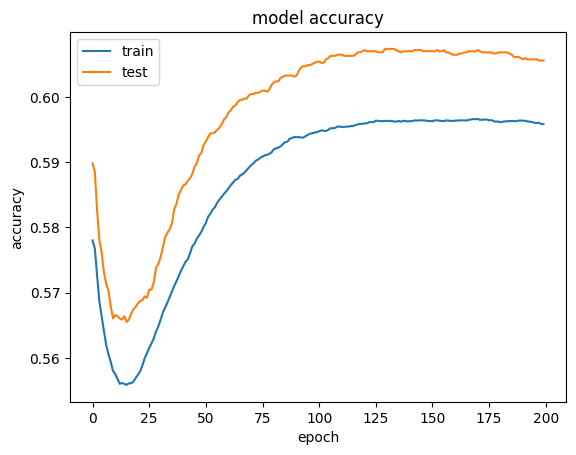

In [10]:
fig, (ax1) = plt.subplots(1)

ax1.plot(A_train)
ax1.plot(A_test)
ax1.set_title("model accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.legend(['train','test'])

plt.show()

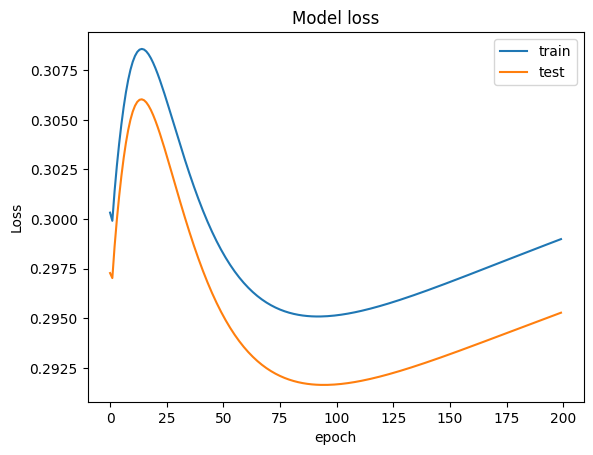

In [11]:
fig, (ax2) = plt.subplots(1)
ax2.plot(L_train)
ax2.plot(L_test)
ax2.set_title("Model loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])
plt.show()


9. Evaluating the Model

In [12]:
model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
Y_pred = Y_pred > 0.5
confusion_matrix(Y_test, Y_pred)

array([[1808,  415],
       [ 251,  453]], dtype=int64)

10. Calculating Precision and Recall

In [13]:
print('precision: ', precision_score(Y_test, Y_pred))
print('recall: ', recall_score(Y_test, Y_pred))

precision:  0.521889400921659
recall:  0.6434659090909091
